In [137]:
from brainda.datasets import Nakanishi2015, Wang2016
from brainda.paradigms import SSVEP
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft
from sklearn.model_selection import KFold
import tensorflow as tf

In [116]:
dataset = Wang2016()
channels = ['PZ', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'O1', 'OZ', 'O2']
srate = 250 # Hz
# dataset = Nakanishi2015()
# channels = ['PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2']
# srate = 256 # Hz

events = sorted(list(dataset.events.keys()))
freqs = [dataset.get_freq(event) for event in events]
phases = [dataset.get_phase(event) for event in events]
start_pnt = dataset.events[events[0]][1][0]
delay = 0.14 # seconds

# duration = 0.5 # seconds
paradigm = SSVEP(
    srate=srate, 
    channels=channels, 
    # intervals=[(start_pnt+delay, start_pnt+delay+duration+0.1)], # more seconds for TDCA 
    events=events)

In [125]:
X, y, meta = paradigm.get_data(
    dataset, 
    subjects=[1], 
    return_concat=False, 
    n_jobs=1, 
    verbose=False)
# eeg = np.zeros((40, 6, 9, 150))
eeg = np.zeros((40, 6, 9, 1250))
# y_temp = np.zeros((40, 6))
for i_target, target in enumerate(X.keys()):
    eeg[i_target] = X[target]
eeg = eeg.transpose((1,0,2,3))
X = eeg[...,np.newaxis]
# y = np.array(list(y.values())).T
eeg.shape

# X, y, meta = paradigm.get_data(
#     dataset, 
#     subjects=[1], 
#     return_concat=False, 
#     n_jobs=1, 
#     verbose=False)
# eeg = np.zeros((12, 15, 8, 1024))
# # y_temp = np.zeros((40, 6))
# for i_target, target in enumerate(X.keys()):
#     eeg[i_target] = X[target]
# eeg = eeg.transpose((1,0,2,3))
# X = eeg[...,np.newaxis]
# y = np.array(list(y.values())).T
# eeg.shape

(6, 40, 9, 1250)

In [118]:
X.shape, y.shape,len(freqs),len(phases) # 6 trials x 40 classes
# (240, 9, 150), (240,) --> (6, 40, 9, 150, 1), (6, 40)

((6, 40, 9, 1250, 1), (6, 40), 40, 40)

In [119]:
# freqs = np.linspace(0.0, 300 / 2, 750)
# psd_filtered = np.abs(fft(eeg_filtered)[:,:,:,:750])
# colors=cm.coolwarm(np.linspace(0,1,36))
# for i,c in enumerate(colors):
#     if i % 4 == 0:
#         plt.figure(figsize=(24, 4))
#         plt.xticks(range(5,49));
#         ax = plt.subplot()
#         ax.set_xlim(5, 49)
#         # ax.set_ylim(0, 0.04)
#     for j in range(eeg_filtered.shape[0]):
#         sns.lineplot(x=freqs, y=psd_filtered[j,i,0,:], ax=ax,color='black', alpha = 0.1)
#     sns.lineplot(x=freqs, y=psd_filtered[:,i,0,:].mean(axis=0), ax=ax, label=str(list(target_tab.keys())[i]),color=c)

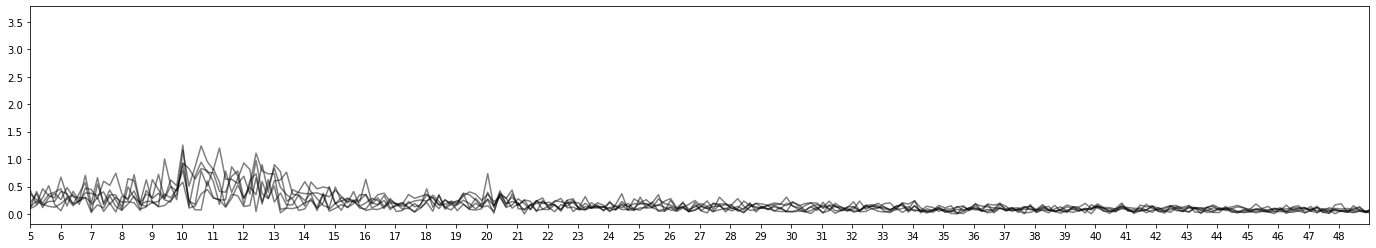

In [120]:
# freqs = np.linspace(0.0, 250 / 2, 75)
# psd = np.abs(fft(eeg)[:,:,:,:75])
freqs = np.linspace(0.0, 250 / 2, 1250//2)
psd = 1/(1250//2)*np.abs(fft(eeg)[:,:,:,:(1250//2)])
plt.figure(figsize=(24, 4))
plt.xticks(range(5,49));
ax = plt.subplot()
ax.set_xlim(5, 49)
for i_trial in range(eeg.shape[0]):
    sns.lineplot(x=freqs, y=psd[i_trial,0,0,:], ax=ax,color='black', alpha = 0.5)

# freqs = np.linspace(0.0, 256 / 2, 512)
# psd = np.abs(fft(eeg)[:,:,:,:512])
# plt.figure(figsize=(24, 4))
# # plt.xticks(range(5,49));
# ax = plt.subplot()
# ax.set_xlim(5, 49)
# ax.set_ylim(0, 1500)
# for i_trial in range(eeg.shape[0]):
#     sns.lineplot(x=freqs, y=psd[i_trial,0,0,:], ax=ax,color='black', alpha = 0.5)

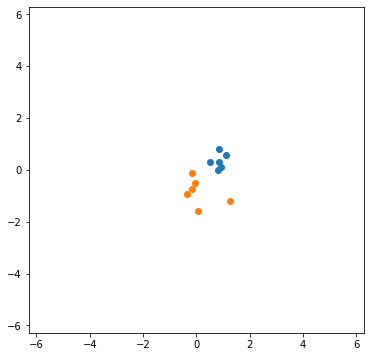

In [132]:
complex_spectrum = 1/(1250//2)*fft(eeg)[:,:,:,:(1250//2)]
plt.figure(figsize=(6, 6))
plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(-2*np.pi, 2*np.pi)
plt.scatter(np.real(complex_spectrum[:,0,0,np.abs(freqs - 10).argmin()]),np.imag(complex_spectrum[:,0,0,np.abs(freqs - 10).argmin()]),label=str(10))
# plt.scatter(np.real(complex_spectrum[:,1,0,np.abs(freqs - 10.2).argmin()]),np.imag(complex_spectrum[:,1,0,np.abs(freqs - 10.2).argmin()]),label=str(10))
# plt.scatter(np.real(complex_spectrum[:,2,0,np.abs(freqs - 10.4).argmin()]),np.imag(complex_spectrum[:,2,0,np.abs(freqs - 10.4).argmin()]),label=str(10))
# plt.scatter(np.real(complex_spectrum[:,3,0,np.abs(freqs - 10.6).argmin()]),np.imag(complex_spectrum[:,3,0,np.abs(freqs - 10.6).argmin()]),label=str(10))
plt.scatter(np.real(complex_spectrum[:,4,0,np.abs(freqs - 10.8).argmin()]),np.imag(complex_spectrum[:,4,0,np.abs(freqs - 10.8).argmin()]),label=str(10))

In [129]:
phases

[1,
 1.5,
 0,
 0.5,
 1,
 1.5,
 0,
 0.5,
 1,
 1.5,
 0,
 0.5,
 1,
 1.5,
 0,
 0.5,
 1,
 1.5,
 0,
 0.5,
 1,
 1.5,
 0,
 0.5,
 1,
 1.5,
 0,
 0.5,
 1,
 1.5,
 0,
 0.5,
 1,
 1.5,
 0,
 0.5,
 1,
 1.5,
 0,
 0.5]

In [130]:
y

{'10': array([0, 0, 0, 0, 0, 0], dtype=int64),
 '10.2': array([1, 1, 1, 1, 1, 1], dtype=int64),
 '10.4': array([2, 2, 2, 2, 2, 2], dtype=int64),
 '10.6': array([3, 3, 3, 3, 3, 3], dtype=int64),
 '10.8': array([4, 4, 4, 4, 4, 4], dtype=int64),
 '11': array([5, 5, 5, 5, 5, 5], dtype=int64),
 '11.2': array([6, 6, 6, 6, 6, 6], dtype=int64),
 '11.4': array([7, 7, 7, 7, 7, 7], dtype=int64),
 '11.6': array([8, 8, 8, 8, 8, 8], dtype=int64),
 '11.8': array([9, 9, 9, 9, 9, 9], dtype=int64),
 '12': array([10, 10, 10, 10, 10, 10], dtype=int64),
 '12.2': array([11, 11, 11, 11, 11, 11], dtype=int64),
 '12.4': array([12, 12, 12, 12, 12, 12], dtype=int64),
 '12.6': array([13, 13, 13, 13, 13, 13], dtype=int64),
 '12.8': array([14, 14, 14, 14, 14, 14], dtype=int64),
 '13': array([15, 15, 15, 15, 15, 15], dtype=int64),
 '13.2': array([16, 16, 16, 16, 16, 16], dtype=int64),
 '13.4': array([17, 17, 17, 17, 17, 17], dtype=int64),
 '13.6': array([18, 18, 18, 18, 18, 18], dtype=int64),
 '13.8': array([19, 19,

In [83]:
np.array(list(y.values())).T.shape

(6, 40)

In [106]:
# -*- coding: utf-8 -*-
# SSVEP Classification Demo

from collections import OrderedDict
import numpy as np
from scipy.signal import sosfiltfilt
from sklearn.pipeline import clone
from sklearn.metrics import balanced_accuracy_score

from brainda.datasets import Wang2016
from brainda.paradigms import SSVEP
from brainda.algorithms.utils.model_selection import (
    set_random_seeds, 
    generate_loo_indices, match_loo_indices)
from brainda.algorithms.decomposition import (
    FBTRCA, FBTDCA, FBSCCA, FBECCA, FBDSP,
    generate_filterbank, generate_cca_references)


dataset = Wang2016()
delay = 0.14 # seconds
channels = ['PZ', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'O1', 'OZ', 'O2']
srate = 250 # Hz
duration = 0.5 # seconds
n_bands = 3
n_harmonics = 5
events = sorted(list(dataset.events.keys()))
freqs = [dataset.get_freq(event) for event in events]
phases = [dataset.get_phase(event) for event in events]

Yf = generate_cca_references(
    freqs, srate, duration, 
    phases=None, 
    n_harmonics=n_harmonics)

start_pnt = dataset.events[events[0]][1][0]
paradigm = SSVEP(
    srate=srate, 
    channels=channels, 
    intervals=[(start_pnt+delay, start_pnt+delay+duration+0.1)], # more seconds for TDCA 
    events=events)

wp = [[8*i, 90] for i in range(1, n_bands+1)]
ws = [[8*i-2, 95] for i in range(1, n_bands+1)]
filterbank = generate_filterbank(
    wp, ws, srate, order=4, rp=1)
filterweights = np.arange(1, len(filterbank)+1)**(-1.25) + 0.25

def data_hook(X, y, meta, caches):
    filterbank = generate_filterbank(
        [[8, 90]], [[6, 95]], srate, order=4, rp=1)
    X = sosfiltfilt(filterbank[0], X, axis=-1)
    return X, y, meta, caches

paradigm.register_data_hook(data_hook)

set_random_seeds(64)
l = 5
models = OrderedDict([
    ('fbscca', FBSCCA(
            filterbank, filterweights=filterweights)),
    ('fbecca', FBECCA(
            filterbank, filterweights=filterweights)),
    ('fbdsp', FBDSP(
            filterbank, filterweights=filterweights)),
    ('fbtrca', FBTRCA(
            filterbank, filterweights=filterweights)),
    ('fbtdca', FBTDCA(
            filterbank, l, n_components=8, 
            filterweights=filterweights)),
])

X, y, meta = paradigm.get_data(
    dataset, 
    subjects=[1], 
    return_concat=True, 
    n_jobs=1, 
    verbose=False)

set_random_seeds(42)
loo_indices = generate_loo_indices(meta)

for model_name in models:
    if model_name == 'fbtdca':
        filterX, filterY = np.copy(X[..., :int(srate*duration)+l]), np.copy(y)
    else:
        filterX, filterY = np.copy(X[..., :int(srate*duration)]), np.copy(y)
    
    filterX = filterX - np.mean(filterX, axis=-1, keepdims=True)

    n_loo = len(loo_indices[1][events[0]])
    loo_accs = []
    for k in range(n_loo):
        train_ind, validate_ind, test_ind = match_loo_indices(
            k, meta, loo_indices)
        train_ind = np.concatenate([train_ind, validate_ind])

        trainX, trainY = filterX[train_ind], filterY[train_ind]
        testX, testY = filterX[test_ind], filterY[test_ind]

        model = clone(models[model_name]).fit(
            trainX, trainY,
            Yf=Yf
        )
        pred_labels = model.predict(testX)
        loo_accs.append(
            balanced_accuracy_score(testY, pred_labels))
    print("Model:{} LOO Acc:{:.2f}".format(model_name, np.mean(loo_accs)))

c:\Users\simon\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model:fbscca LOO Acc:0.14
Model:fbecca LOO Acc:0.77
Model:fbdsp LOO Acc:0.88
Model:fbtrca LOO Acc:0.92
Model:fbtdca LOO Acc:0.96


In [159]:
dataset = Nakanishi2015()
channels = ['PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2']
srate = 256 # Hz
delay = 0.14 # seconds
duration = 0.5 # seconds
n_bands = 3
n_harmonics = 5
events = sorted(list(dataset.events.keys()))
freqs = [dataset.get_freq(event) for event in events]
phases = [dataset.get_phase(event) for event in events]
start_pnt = dataset.events[events[0]][1][0]
# Yf = generate_cca_references(
#     freqs, srate, duration, 
#     phases=None, 
#     n_harmonics=n_harmonics)
Yf = generate_cca_references(
    freqs, srate, duration, 
    phases=phases, 
    n_harmonics=n_harmonics)

wp = [[8*i, 90] for i in range(1, n_bands+1)]
ws = [[8*i-2, 95] for i in range(1, n_bands+1)]
filterbank = generate_filterbank(
    wp, ws, srate, order=4, rp=1)
filterweights = np.arange(1, len(filterbank)+1)**(-1.25) + 0.25
def data_hook(X, y, meta, caches):
    filterbank = generate_filterbank(
        [[8, 90]], [[6, 95]], srate, order=4, rp=1)
    X = sosfiltfilt(filterbank[0], X, axis=-1)
    return X, y, meta, caches

paradigm = SSVEP(
    srate=srate, 
    channels=channels, 
    intervals=[(start_pnt+delay, start_pnt+delay+duration+0.1)], # more seconds for TDCA 
    events=events)
# paradigm.register_data_hook(data_hook)
X, y, meta = paradigm.get_data(
    dataset, 
    subjects=[1], 
    return_concat=True, 
    n_jobs=1, 
    verbose=False)

set_random_seeds(64)
l = 5
models = OrderedDict([
    ('fbscca', FBSCCA(
            filterbank, filterweights=filterweights)),
    ('fbecca', FBECCA(
            filterbank, filterweights=filterweights)),
    ('fbdsp', FBDSP(
            filterbank, filterweights=filterweights)),
    ('fbtrca', FBTRCA(
            filterbank, filterweights=filterweights)),
    ('fbtdca', FBTDCA(
            filterbank, l, n_components=8, 
            filterweights=filterweights)),
])

set_random_seeds(42)
loo_indices = generate_loo_indices(meta)

for model_name in models:
    if model_name == 'fbtdca':
        filterX, filterY = np.copy(X[..., :int(srate*duration)+l]), np.copy(y)
    else:
        filterX, filterY = np.copy(X[..., :int(srate*duration)]), np.copy(y)
    
    filterX = filterX - np.mean(filterX, axis=-1, keepdims=True)

    n_loo = len(loo_indices[1][events[0]])
    loo_accs = []
    for k in range(n_loo):
        train_ind, validate_ind, test_ind = match_loo_indices(
            k, meta, loo_indices)
        train_ind = np.concatenate([train_ind, validate_ind])

        trainX, trainY = filterX[train_ind], filterY[train_ind]
        testX, testY = filterX[test_ind], filterY[test_ind]

        model = clone(models[model_name]).fit(
            trainX, trainY,
            Yf=Yf
        )
        pred_labels = model.predict(testX)
        loo_accs.append(
            balanced_accuracy_score(testY, pred_labels))
    print("Model:{} LOO Acc:{:.2f}".format(model_name, np.mean(loo_accs)))


KeyboardInterrupt: 

In [155]:
X.shape, y.shape

((180, 8, 153), (180,))

In [163]:
freqs,phases

([10.25,
  10.75,
  11.25,
  11.75,
  12.25,
  12.75,
  13.25,
  13.75,
  14.25,
  14.75,
  9.25,
  9.75],
 [1, 1.5, 0, 0.5, 1, 1.5, 0, 0.5, 1, 1.5, 0, 0.5])

In [153]:
loo_indices[1]

{'10.25': [(array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14]),
   array([7]),
   array([0])),
  (array([ 0,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
   array([4]),
   array([1])),
  (array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14]),
   array([13]),
   array([2])),
  (array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14]),
   array([11]),
   array([3])),
  (array([ 0,  1,  2,  3,  5,  6,  7,  9, 10, 11, 12, 13, 14]),
   array([8]),
   array([4])),
  (array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 14]),
   array([13]),
   array([5])),
  (array([ 0,  1,  2,  3,  5,  7,  8,  9, 10, 11, 12, 13, 14]),
   array([4]),
   array([6])),
  (array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14]),
   array([6]),
   array([7])),
  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 11, 12, 13, 14]),
   array([10]),
   array([8])),
  (array([ 0,  1,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14]),
   array([2]),
   array([9])),
  (array([ 0,  1,  2,  3,  4,  5,  7,

In [149]:
loo_indices[1]

{'10.25': [(array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14]),
   array([7]),
   array([0])),
  (array([ 0,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
   array([4]),
   array([1])),
  (array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14]),
   array([13]),
   array([2])),
  (array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14]),
   array([11]),
   array([3])),
  (array([ 0,  1,  2,  3,  5,  6,  7,  9, 10, 11, 12, 13, 14]),
   array([8]),
   array([4])),
  (array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 14]),
   array([13]),
   array([5])),
  (array([ 0,  1,  2,  3,  5,  7,  8,  9, 10, 11, 12, 13, 14]),
   array([4]),
   array([6])),
  (array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14]),
   array([6]),
   array([7])),
  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 11, 12, 13, 14]),
   array([10]),
   array([8])),
  (array([ 0,  1,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14]),
   array([2]),
   array([9])),
  (array([ 0,  1,  2,  3,  4,  5,  7,

In [145]:
Yf.shape

(12, 10, 128)

In [143]:
phases

[1, 1.5, 0, 0.5, 1, 1.5, 0, 0.5, 1, 1.5, 0, 0.5]

In [140]:
X.shape

(180, 8, 153)

In [141]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11], dtype=int64)

In [142]:
15*12

180

In [ ]:
def EEGNet_SSVEP(nb_classes, Chans, Samples, 
             dropoutRate = 0.3, kernLength = 256, F1 = 96, 
             D = 1, F2 = 96, dropoutType = 'Dropout'):
    """ SSVEP Variant of EEGNet, as used in [1]. 
    Inputs:
        
      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn. 
      D               : number of spatial filters to learn within each temporal
                        convolution.
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.
      
      
    [1]. Waytowich, N. et. al. (2018). Compact Convolutional Neural Networks
    for Classification of Asynchronous Steady-State Visual Evoked Potentials.
    Journal of Neural Engineering vol. 15(6). 
    http://iopscience.iop.org/article/10.1088/1741-2552/aae5d8
    """
    
    if dropoutType == 'SpatialDropout2D':
        dropoutType = tf.keras.layers.SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = tf.keras.layers.Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')
    
    input1   = tf.keras.Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = tf.keras.layers.Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = tf.keras.layers.BatchNormalization()(block1)
    block1       = tf.keras.layers.DepthwiseConv2D((Chans, 1), use_bias = False, 
                                   depth_multiplier = D,
                                   depthwise_constraint = tf.keras.constraints.max_norm(1.))(block1)
    block1       = tf.keras.layers.BatchNormalization()(block1)
    block1       = tf.keras.layers.Activation('elu')(block1)
    block1       = tf.keras.layers.AveragePooling2D((1, 4))(block1)
    block1       = dropoutType(dropoutRate)(block1)
    
    block2       = tf.keras.layers.SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = tf.keras.layers.BatchNormalization()(block2)
    block2       = tf.keras.layers.Activation('elu')(block2)
    block2       = tf.keras.layers.AveragePooling2D((1, 8))(block2)
    block2       = dropoutType(dropoutRate)(block2)
        
    flatten      = tf.keras.layers.Flatten(name = 'flatten')(block2)
    
    dense        = tf.keras.layers.Dense(nb_classes, name = 'dense')(flatten)
    softmax      = tf.keras.layers.Activation('softmax', name = 'softmax')(dense)
    
    return tf.keras.Model(inputs=input1, outputs=softmax)
num_channels = 8
timepoints_stimulus_duration = 1024
# hyperparameters
epochs = 150
batch_size = 100
learning_rate = 1e-3
dropout_rate = 0.5
# build model
kf = KFold(n_splits=6)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index].reshape(-1, *X[train_index].shape[2:]), X[test_index].reshape(-1, *X[test_index].shape[2:])
    y_train, y_test = y[train_index].reshape(-1), y[test_index].reshape(-1)
    print(y_test[:5], y_train[:5])
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    model = EEGNet_SSVEP(len(freqs), num_channels, timepoints_stimulus_duration, dropoutRate=dropout_rate)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['acc'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)